In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.shape

(303, 14)

In [ ]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

<ipython-input-9-bb3406af18fd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=df,palette='bwr')


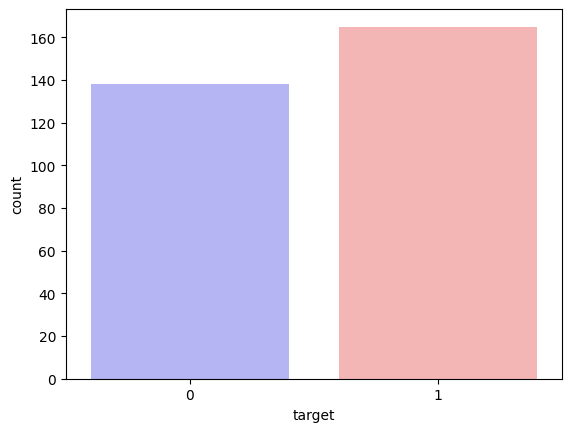

In [ ]:
sns.countplot(x='target',data=df,palette='bwr')
plt.show()

In [ ]:
count_nodisease = len(df[df.target == 0])
count_disease = len(df[df.target == 1])
total_count = len(df)

percentage_nodisease = (count_nodisease / total_count) * 100
percentage_disease = (count_disease / total_count) * 100

print("Percentage of people not having heart disease: {:.2f}%".format(percentage_nodisease))
print("Percentage of people having heart disease: {:.2f}%".format(percentage_disease))


Percentage of people not having heart disease: 45.54%
Percentage of people having heart disease: 54.46%


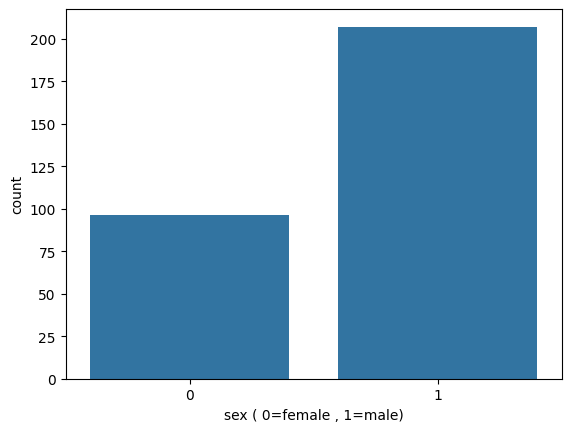

In [ ]:
sns.countplot(x='sex',data=df)
plt.xlabel("sex ( 0=female , 1=male)")
plt.show()

In [ ]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
total_count = len(df)

percentage_female = (countFemale / total_count) * 100
percentage_male = (countMale / total_count) * 100

print("Percentage of Female patient: {:.2f}%".format(percentage_female))
print("Percentage of Male patient: {:.2f}%".format(percentage_male))

Percentage of Female patient: 31.68%
Percentage of Male patient: 68.32%


In [ ]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


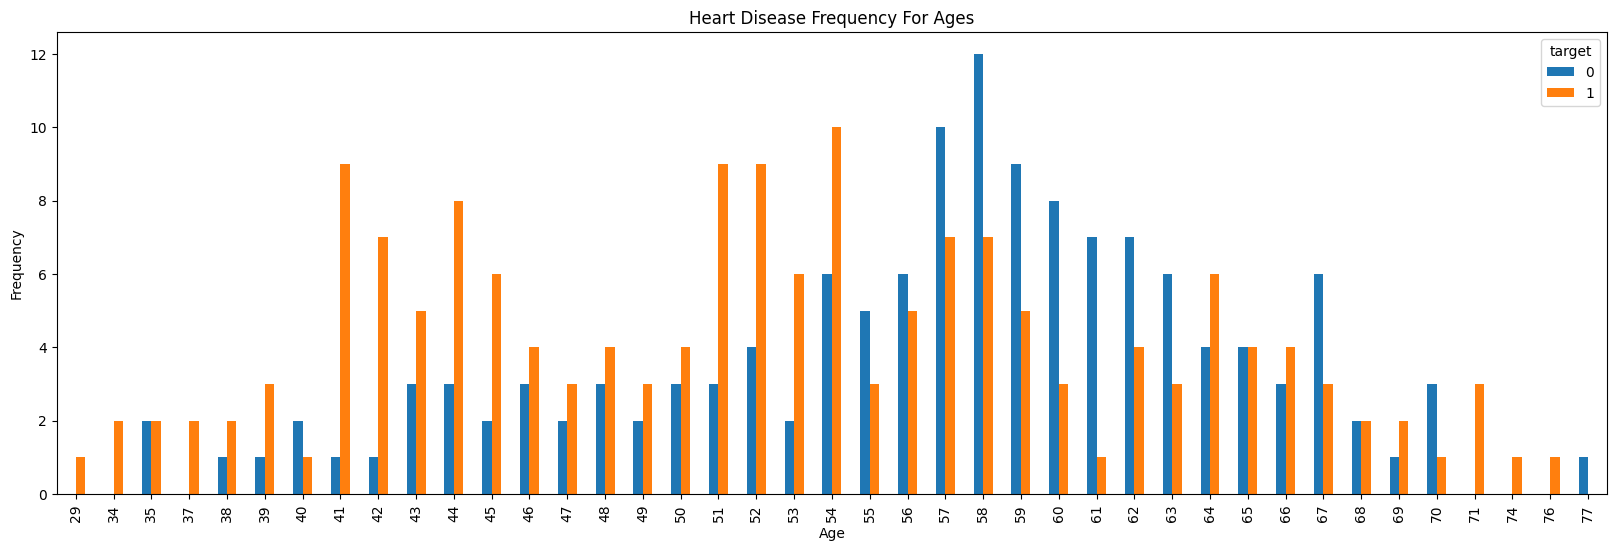

In [ ]:
pd.crosstab(df.age,df.target).plot(kind='bar',figsize=(20,6))
plt.title("Heart Disease Frequency For Ages")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartdiseaseandages.png')
plt.show()

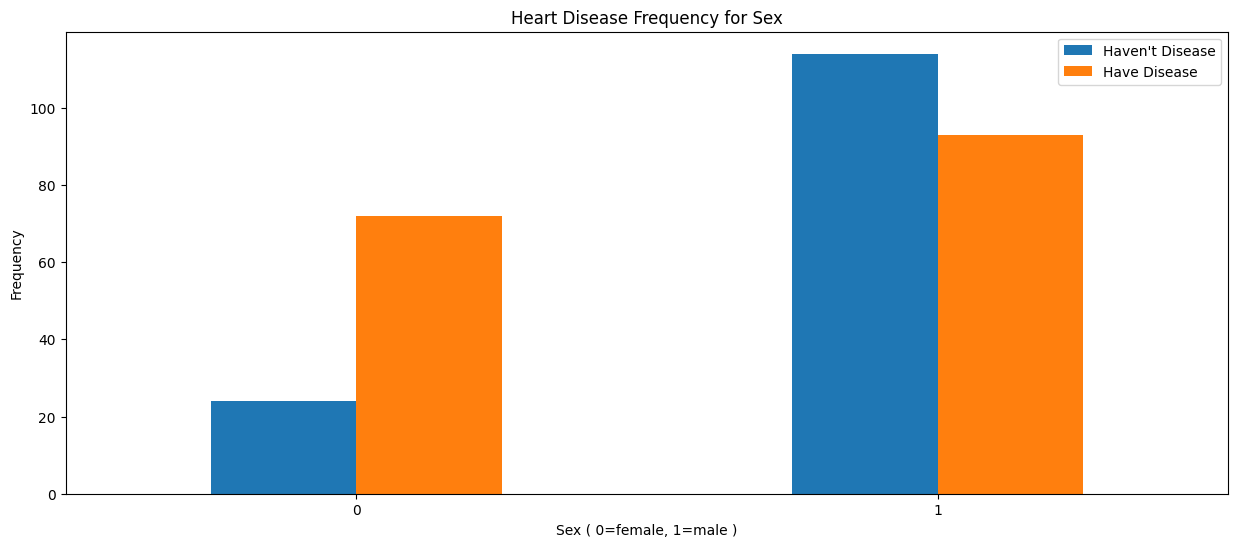

In [ ]:
pd.crosstab(df.sex,df.target).plot(kind='bar',figsize=(15,6))
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("Sex ( 0=female, 1=male )")
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

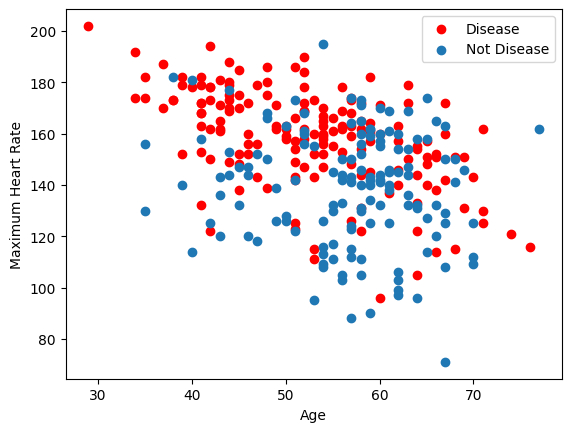

In [ ]:
plt.scatter(x=df.age[df.target==1],y=df.thalach[(df.target==1)],c="red")
plt.scatter(x=df.age[df.target==0],y=df.thalach[(df.target==0)])
plt.legend(["Disease","Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

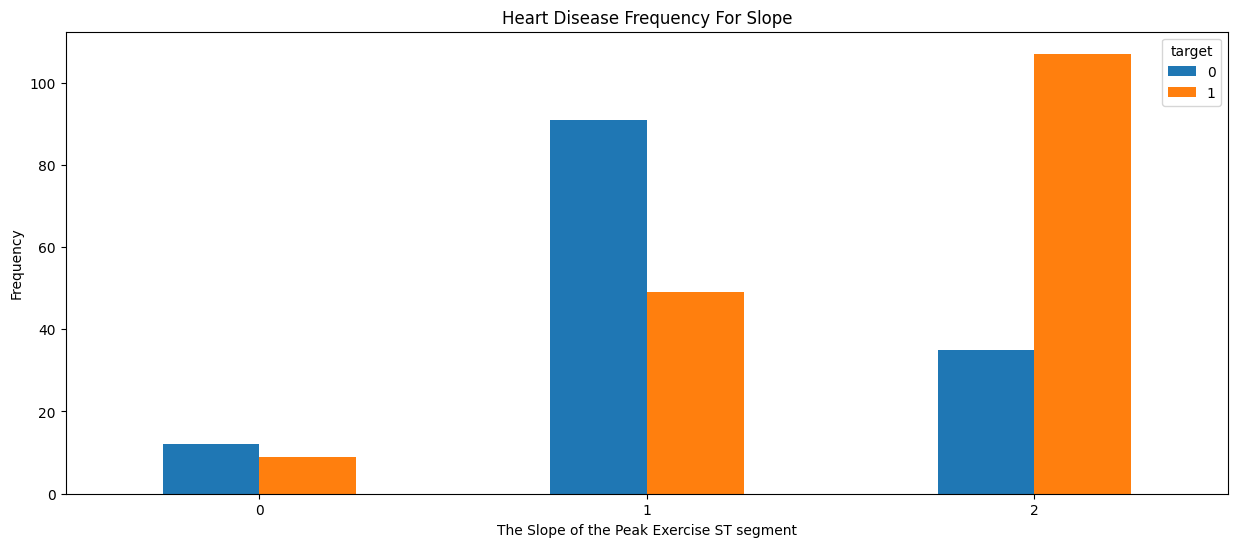

In [ ]:
pd.crosstab(df.slope,df.target).plot(kind="bar", figsize=(15,6))
plt.title("Heart Disease Frequency For Slope")
plt.xlabel("The Slope of the Peak Exercise ST segment")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()


<ipython-input-18-fc81d7471bc1>:5: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("Haven't Disease","Have Diesease")


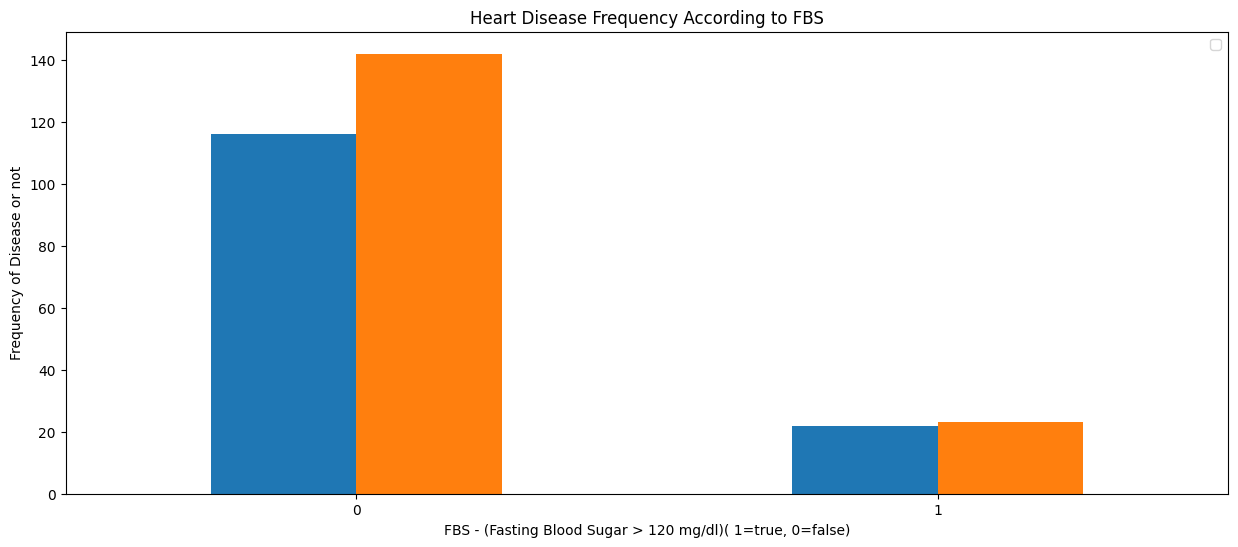

In [ ]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6))
plt.title("Heart Disease Frequency According to FBS")
plt.xlabel("FBS - (Fasting Blood Sugar > 120 mg/dl)( 1=true, 0=false)")
plt.xticks(rotation=0)
plt.legend("Haven't Disease","Have Diesease")
plt.ylabel("Frequency of Disease or not")
plt.show()

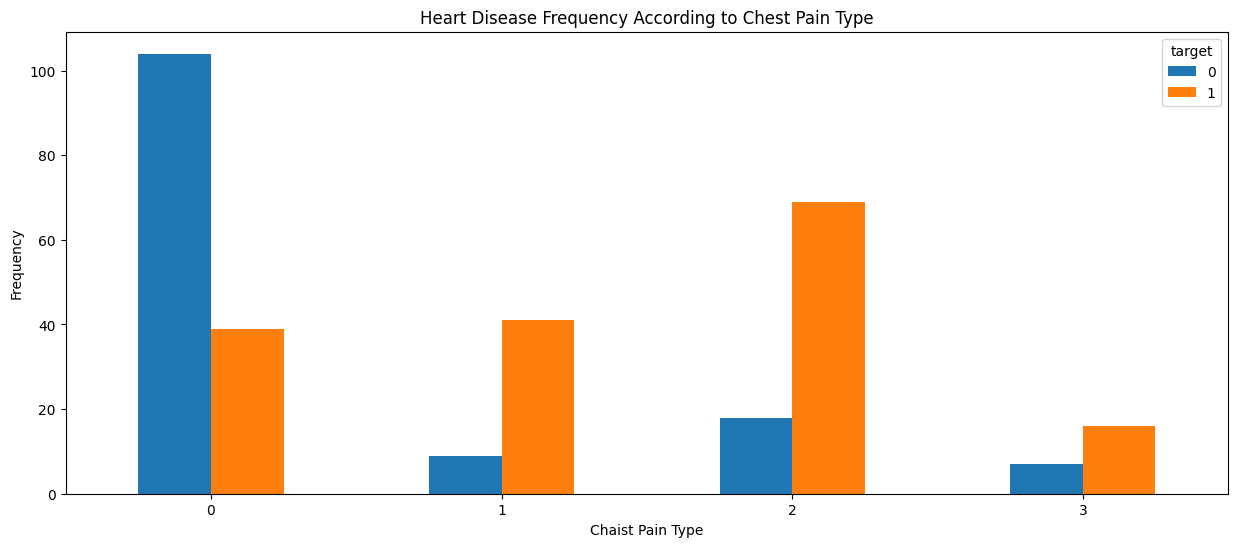

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6))
plt.title("Heart Disease Frequency According to Chest Pain Type")
plt.xlabel("Chaist Pain Type")
plt.xticks(rotation=0)
plt.ylabel("Frequency")
plt.show()

In [ ]:
a = pd.get_dummies(df['cp'],prefix='cp')
b = pd.get_dummies(df['thal'],prefix='thal')
c = pd.get_dummies(df['slope'],prefix='slope')

In [ ]:
frames = [ df,a,b,c ]
df = pd.concat(frames,axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,False,False,True,False,True,False,False,True,False,False
1,37,1,2,130,250,0,1,187,0,3.5,...,False,True,False,False,False,True,False,True,False,False
2,41,0,1,130,204,0,0,172,0,1.4,...,True,False,False,False,False,True,False,False,False,True
3,56,1,1,120,236,0,1,178,0,0.8,...,True,False,False,False,False,True,False,False,False,True
4,57,0,0,120,354,0,1,163,1,0.6,...,False,False,False,False,False,True,False,False,False,True


In [ ]:
df = df.drop(columns=['cp','thal','slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,False,False,True,False,True,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,0,...,False,True,False,False,False,True,False,True,False,False
2,41,0,130,204,0,0,172,0,1.4,0,...,True,False,False,False,False,True,False,False,False,True
3,56,1,120,236,0,1,178,0,0.8,0,...,True,False,False,False,False,True,False,False,False,True
4,57,0,120,354,0,1,163,1,0.6,0,...,False,False,False,False,False,True,False,False,False,True


In [ ]:
y = df.target.values
x_data = df.drop(['target'],axis = 1)

In [ ]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [ ]:
def initialize(dimension):
  weight = np.full((dimension,1),0.01)
  bias = 0.0
  return weight,bias

In [ ]:
def sigmoid(z):
  y_head = 1/(1+np.exp(-z))
  return y_head

In [ ]:
def forwardBackward(weight,bias,x_train,y_train):
  y_head = sigmoid(np.dot(weight.T,x_train) + bias)
  loss = -(y_train*np.log(y_head) + ( 1-y_train)*np.log(1-y_head))
  cost = np.sum(loss) / x_train.shape[1]

  derived_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
  derived_bias = np.sum(y_head-y_train)/x_train.shape[1]
  gradients = {"Derived Weight" : derived_weight, "Derived Bias" : derived_bias}
  return cost,gradients

In [ ]:
def update(weight,bias,x_train,y_train,learningRate,iteration):
  costList = []
  index = []
  for i in range (iteration):
    cost,gradients = forwardBackward(weight,bias,x_train,y_train)
    weight = weight - learningRate * gradients["Derived Weight"]
    bias = bias - learningRate * gradients["Derived Bias"]

    costList.append(cost)
    index.append(i)

  parameters = {"weight": weight,"bias":bias}

  print("iteraion :",iteration)
  print("cost :",cost)

  plt.plot(index,costList)
  plt.xlabel("Number of Iteration")
  plt.ylabel("Cost")
  plt.show()

  return parameters, gradients


In [ ]:
def predict(weight,bias,x_test):
  z = np.dot(weight.T,x_test) + bias
  y_head = sigmoid(z)

  y_prediction = np.zeros((1,x_test.shape[1]))

  for i in range (y_head.shape[1]):
    if y_head[0,i] <= 0.5:
      y_prediction[0,i] = 0
    else:
      y_prediction[0,i] = 1
  return y_prediction

In [ ]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
  dimension = x_train.shape[0]
  weight,bias = initialize(dimension)

  parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

  y_prediction = predict(parameters["weight"],parameters["bias"],x_test)

  print("Mannual Test Accuracy: {:.2f}%".format((100-np.mean(np.abs(y_prediction)))))

iteraion : 100
cost : 0.6805180043953309


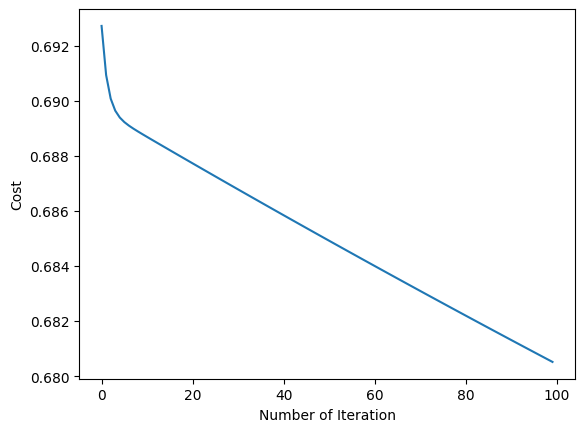

Mannual Test Accuracy: 99.00%


In [ ]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

In [ ]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['logistic Regression'] = acc
print("Test Acuuracy {:.2f}%".format(acc))

Test Acuuracy 57.38%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train.T,y_train.T)
prediction = knn.predict(x_test.T)
print("{} NN Score: {:.2f}%".format(2,knn.score(x_test.T,y_test.T)*100))

2 NN Score: 62.30%


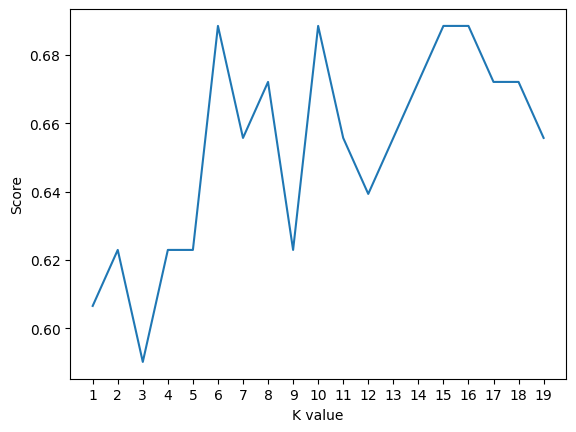

Maximum KNN Score is 68.85%


In [ ]:
scoreList = []
for i in range(1,20):
  knn2 = KNeighborsClassifier(n_neighbors = i)
  knn2.fit(x_train.T,y_train.T)
  scoreList.append(knn2.score(x_test.T,y_test.T))

plt.plot(range(1,20),scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(random_state = 1)
svm.fit(x_train.T,y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm : {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm : 60.66%


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T,y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes : {:.2f}%".format(acc))

Accuracy of Naive Bayes : 80.33%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T,y_train.T)

acc = dtc.score(x_test.T,y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy : {:.2f}%".format(acc))

Decision Tree Test Accuracy : 75.41%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000,random_state = 1 )
rf.fit(x_train.T,y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 81.97%


<ipython-input-42-ecea6d9cf32b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette = colors)


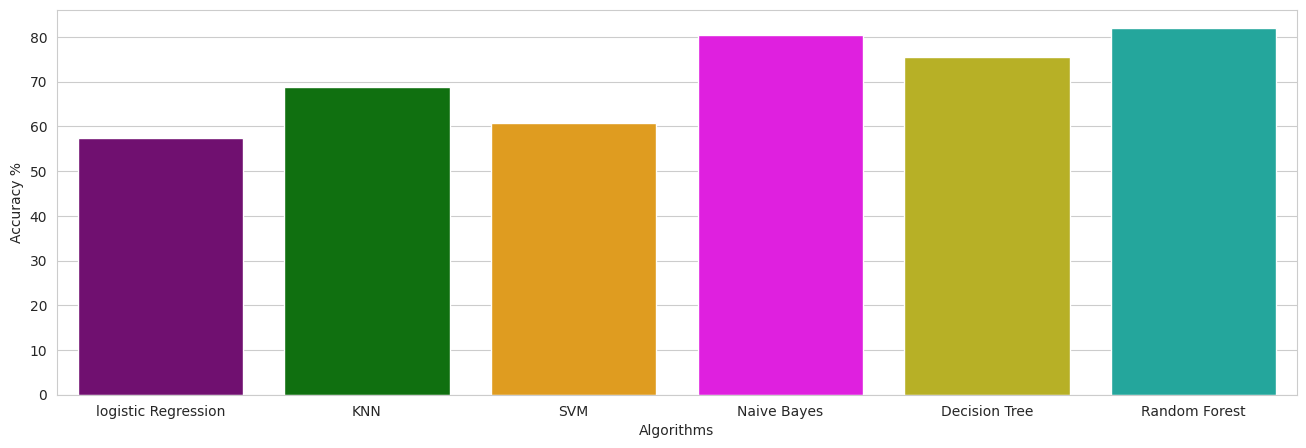

In [ ]:
colors = ["purple", "green", "orange", "magenta", "#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette = colors)
plt.show()

In [ ]:
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

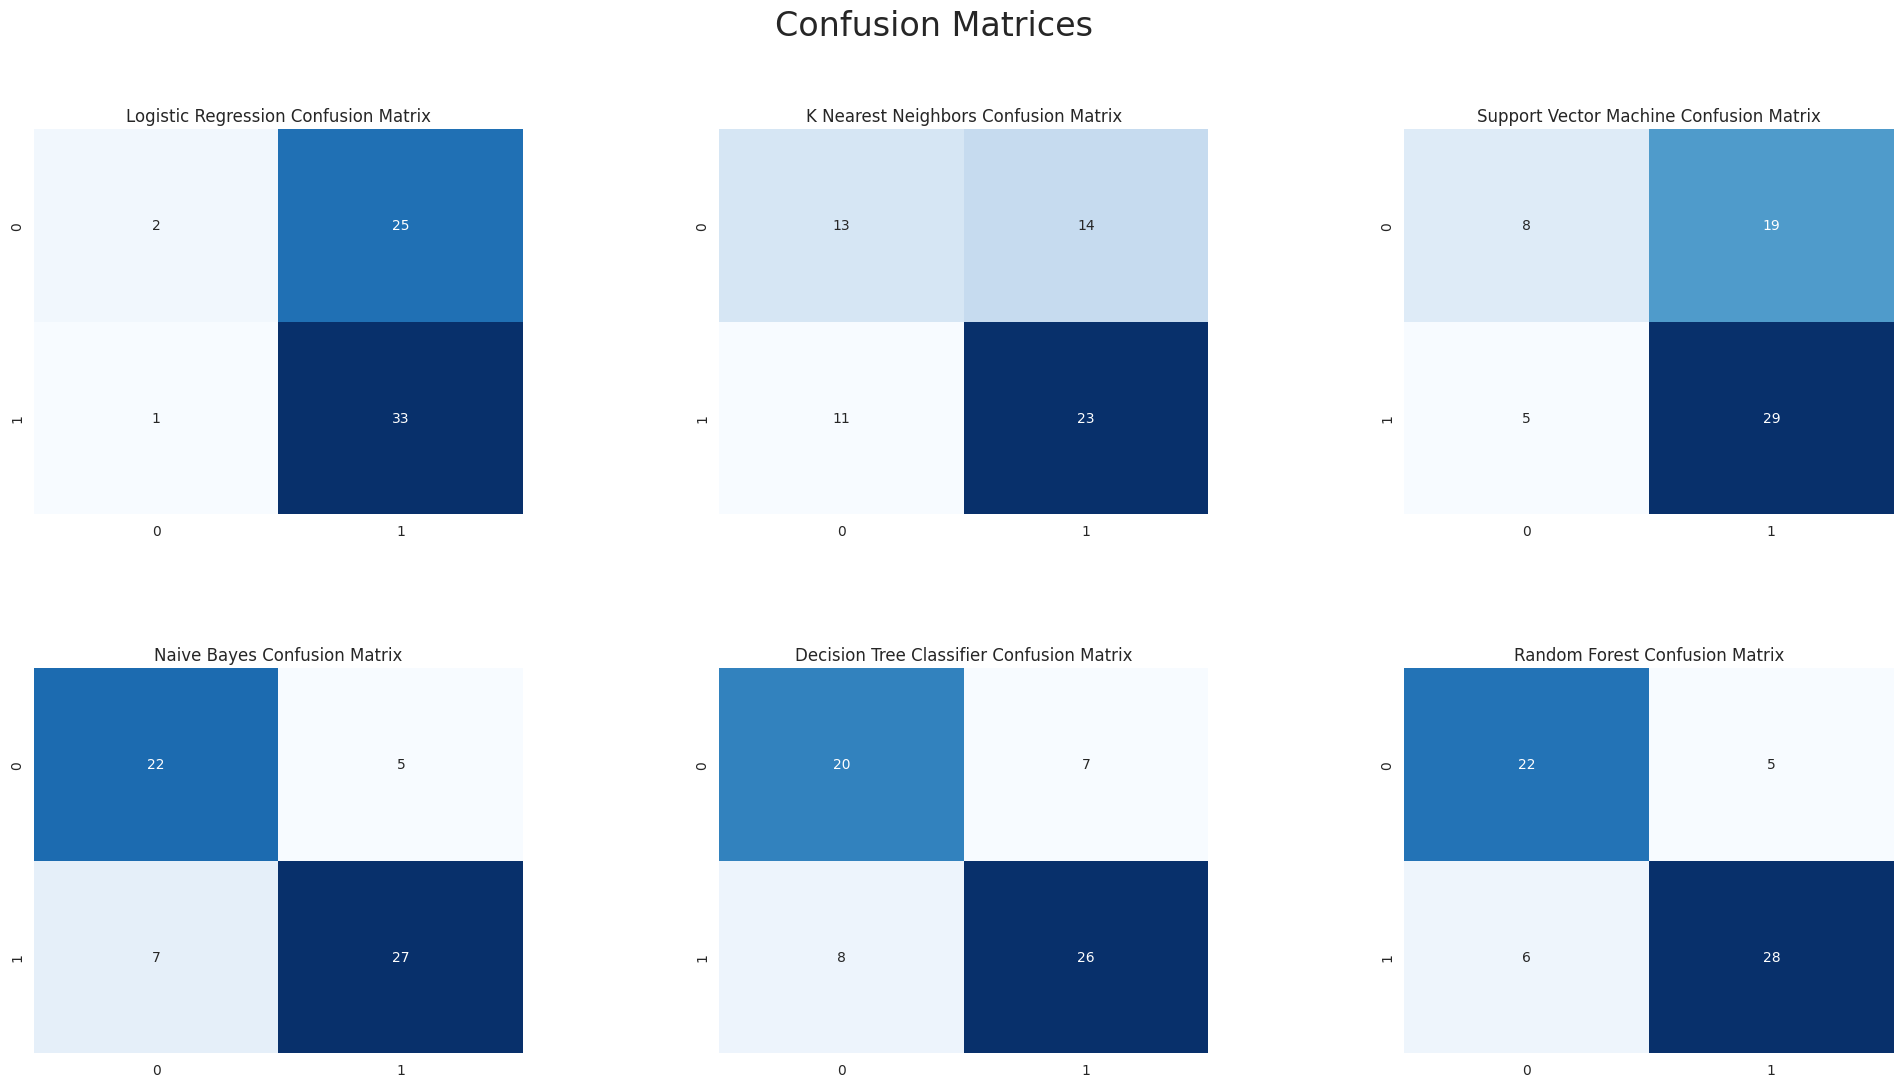

In [ ]:
plt.figure(figsize=(24,12))
plt.suptitle("Confusion Matrices",fontsize=24)
plt.subplots_adjust(wspace=0.4,hspace=0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr, annot=True, cmap="Blues", fmt="d",cbar=False)

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt="d",cbar=False)

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm, annot=True, cmap="Blues", fmt="d",cbar=False)

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb, annot=True, cmap="Blues", fmt="d",cbar=False)

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc, annot=True, cmap="Blues", fmt="d",cbar=False)

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt="d",cbar=False)

plt.show()

<ipython-input-52-e73fc92b4fef>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target",data=df,palette="bwr")


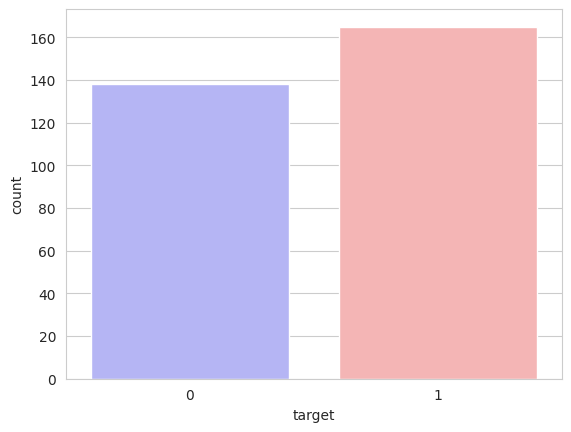

In [ ]:
sns.countplot(x="target",data=df,palette="bwr")
plt.show()

<ipython-input-53-e1baa4a42e25>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex',data=df, palette="mako_r")


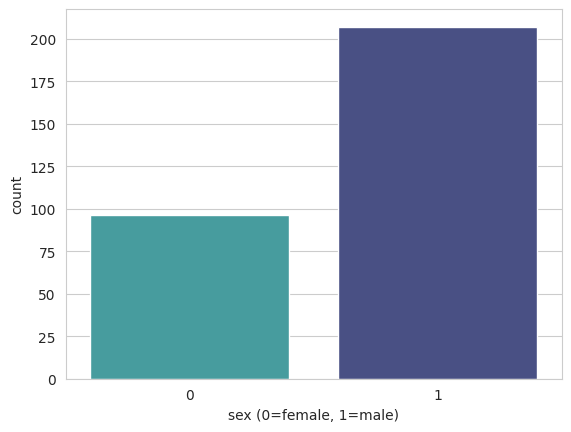

In [ ]:
sns.countplot(x='sex',data=df, palette="mako_r")
plt.xlabel("sex (0=female, 1=male)")
plt.show()

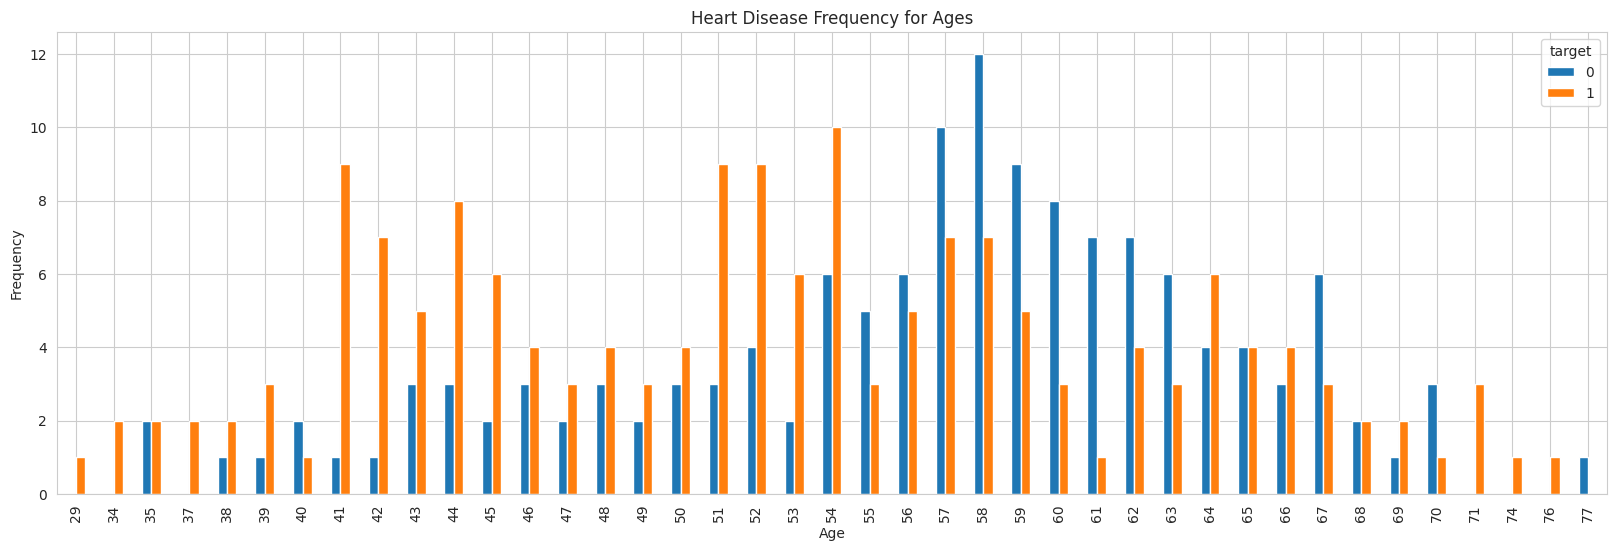

In [ ]:
pd.crosstab(df.age,df.target).plot(kind='bar',figsize=(20,6))
plt.title("Heart Disease Frequency for Ages")
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.savefig("heartDiseaseAndAges.png")
plt.show()

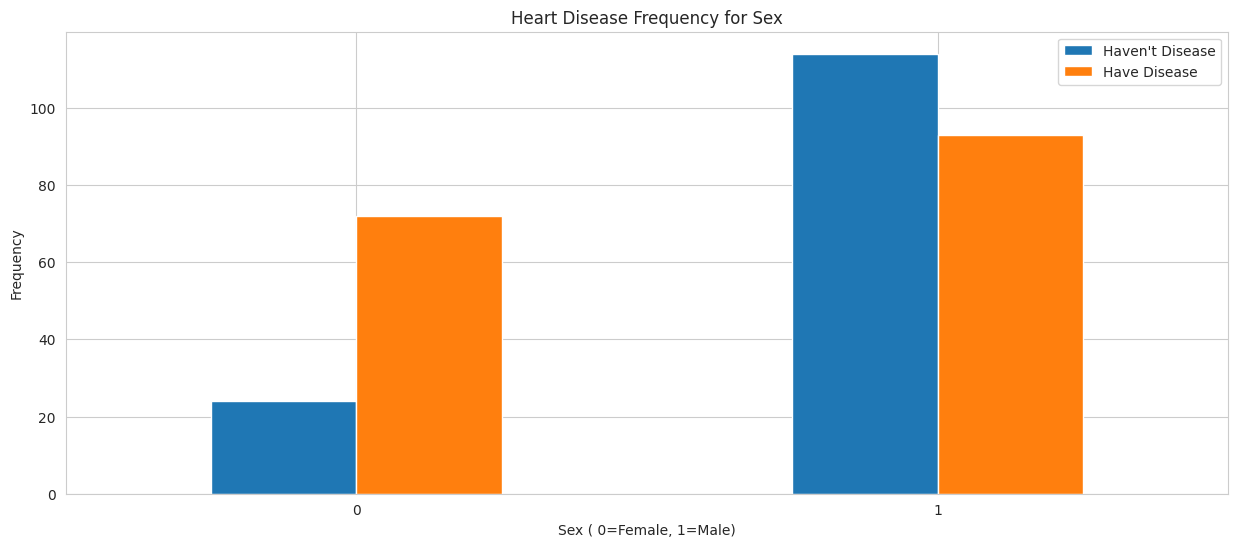

In [ ]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6))
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("Sex ( 0=Female, 1=Male)")
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel("Frequency")
plt.show()

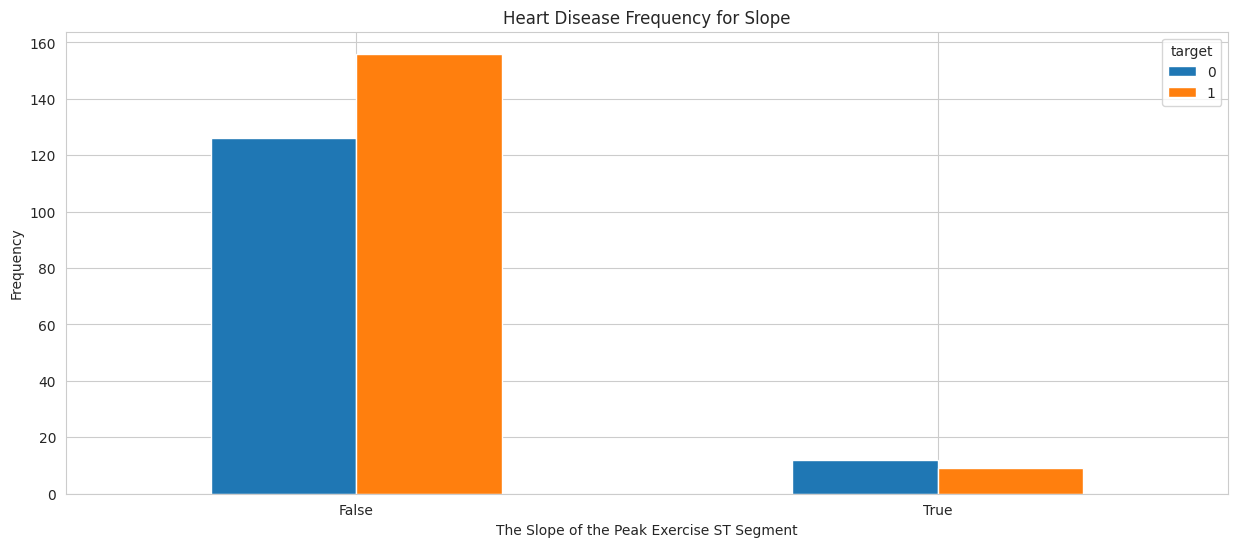

In [ ]:
pd.crosstab(df.slope_0,df.target).plot(kind="bar",figsize=(15,6))
plt.title("Heart Disease Frequency for Slope")
plt.xlabel("The Slope of the Peak Exercise ST Segment")
plt.xticks(rotation=0)
plt.ylabel("Frequency")
plt.show()

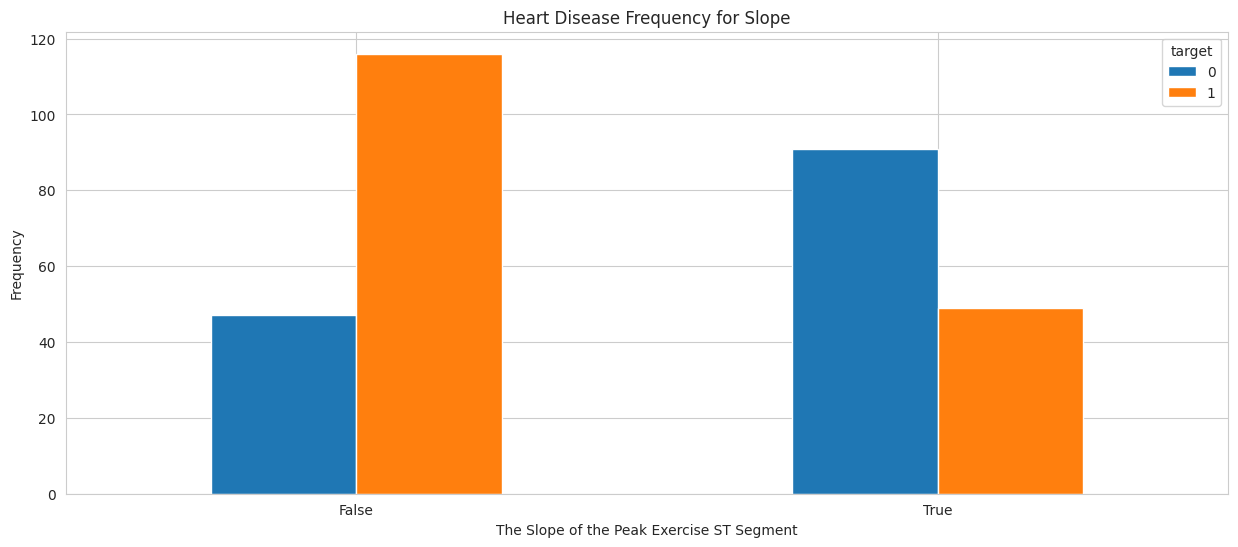

In [ ]:
pd.crosstab(df.slope_1,df.target).plot(kind="bar",figsize=(15,6))
plt.title("Heart Disease Frequency for Slope")
plt.xlabel("The Slope of the Peak Exercise ST Segment")
plt.xticks(rotation=0)
plt.ylabel("Frequency")
plt.show()

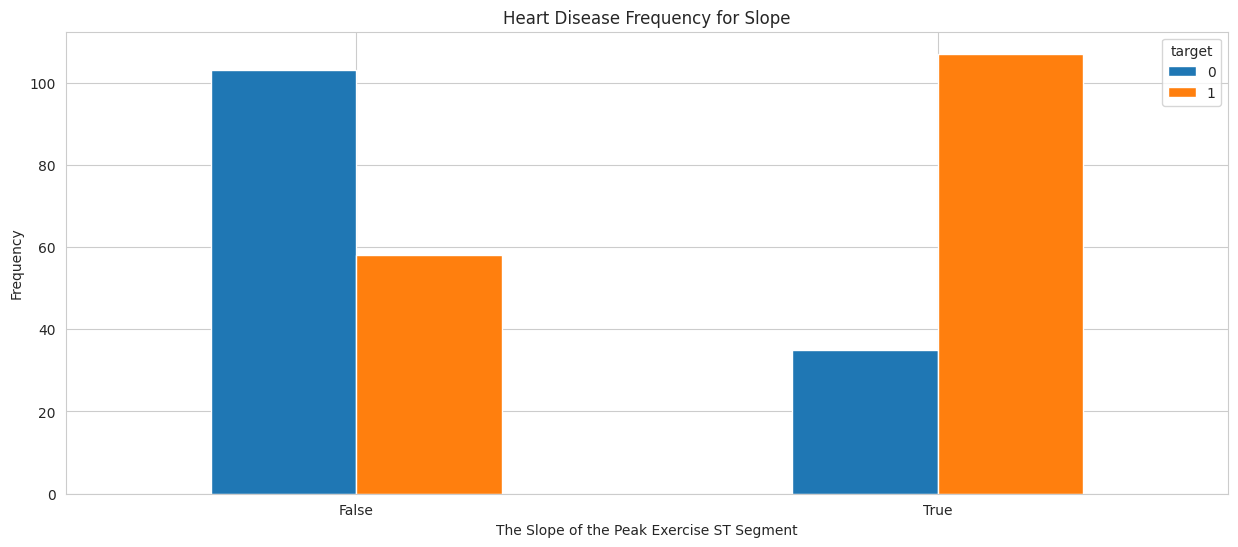

In [ ]:
pd.crosstab(df.slope_2,df.target).plot(kind="bar",figsize=(15,6))
plt.title("Heart Disease Frequency for Slope")
plt.xlabel("The Slope of the Peak Exercise ST Segment")
plt.xticks(rotation=0)
plt.ylabel("Frequency")
plt.show()

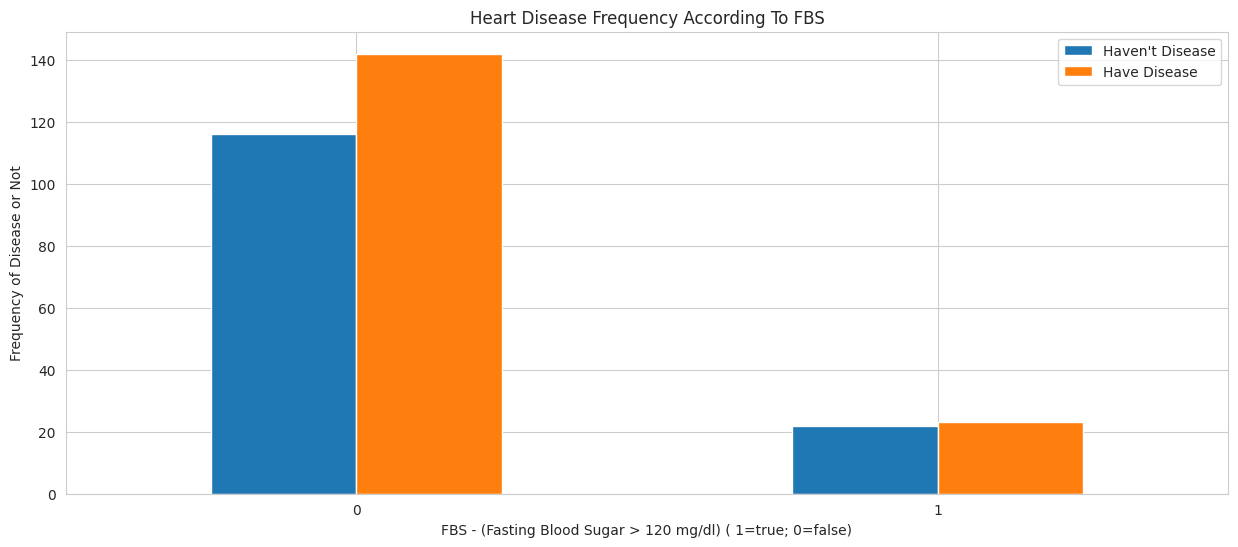

In [ ]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6))
plt.title("Heart Disease Frequency According To FBS")
plt.xlabel("FBS - (Fasting Blood Sugar > 120 mg/dl) ( 1=true; 0=false)")
plt.xticks(rotation=0)
plt.legend(["Haven't Disease","Have Disease"])
plt.ylabel("Frequency of Disease or Not")
plt.show()

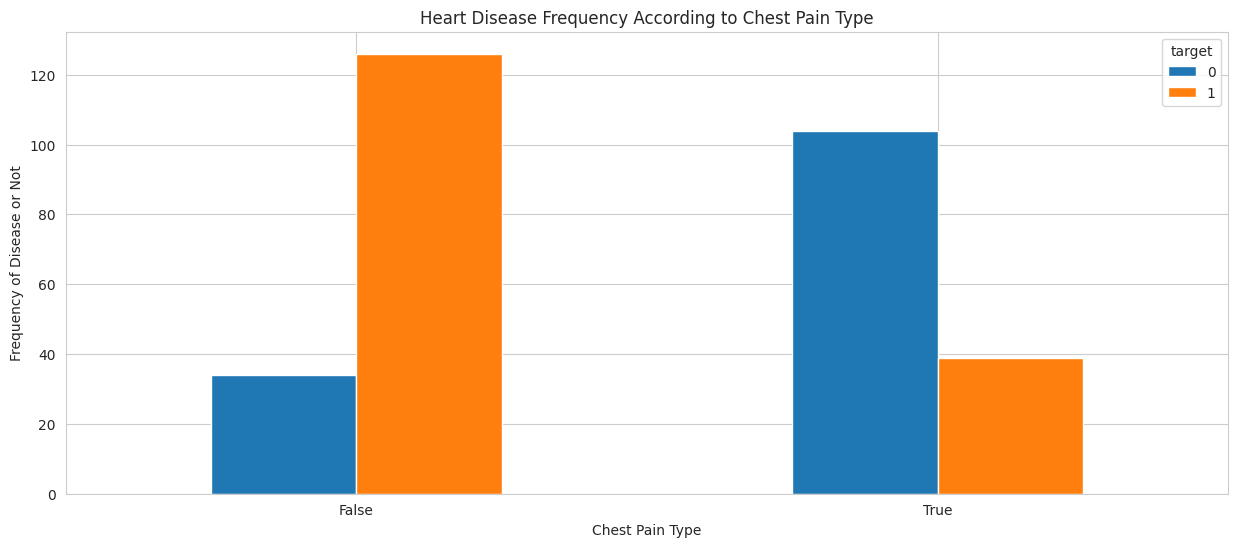

In [ ]:
pd.crosstab(df.cp_0,df.target).plot(kind="bar",figsize=(15,6))
plt.title("Heart Disease Frequency According to Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease or Not")
plt.show()

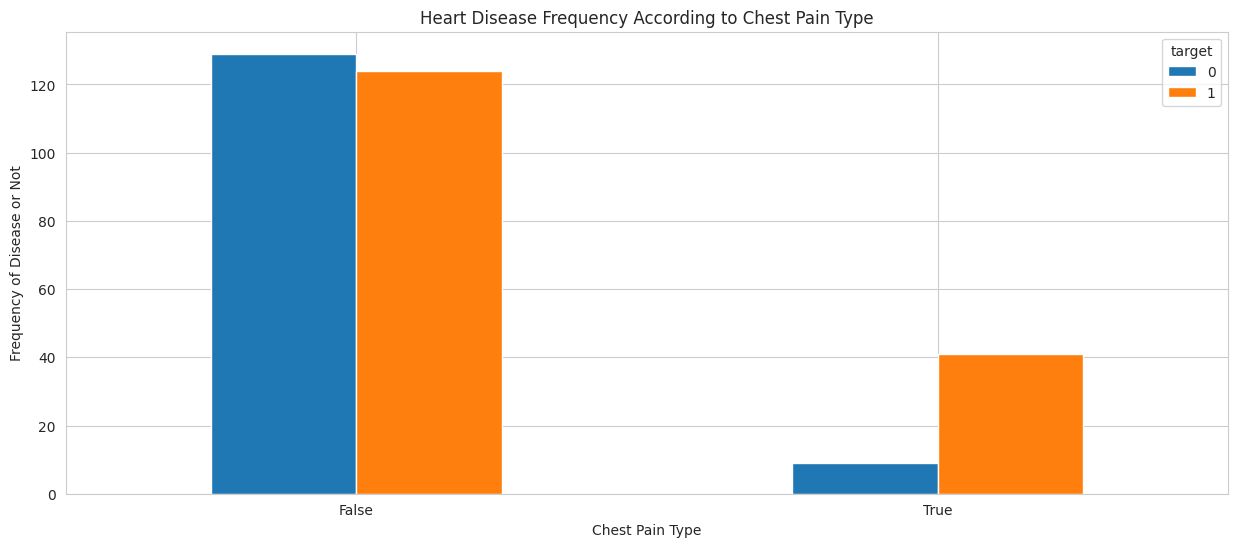

In [ ]:
pd.crosstab(df.cp_1,df.target).plot(kind="bar",figsize=(15,6))
plt.title("Heart Disease Frequency According to Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease or Not")
plt.show()

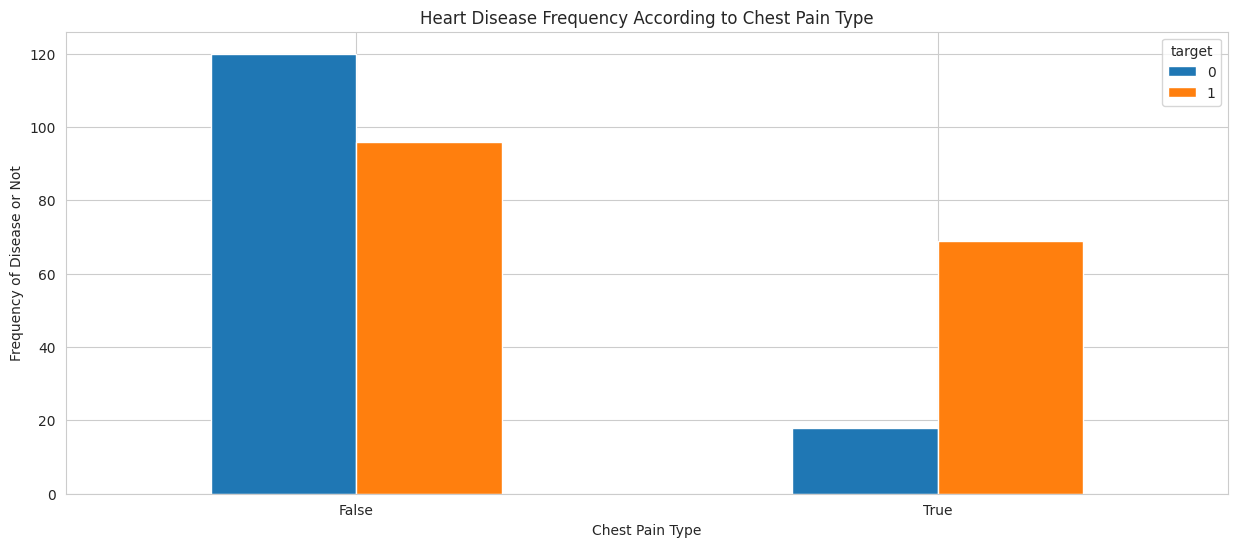

In [ ]:
pd.crosstab(df.cp_2,df.target).plot(kind="bar",figsize=(15,6))
plt.title("Heart Disease Frequency According to Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease or Not")
plt.show()